#  Gaussian Mixture Models for generating new faces

Training a Gaussian mixture model on the Olivetti faces dataset.

First get the olivetti data sets.

In [1]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [28]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

In [3]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

## 1. Train a Gaussian mixture model on the Olivetti faces dataset. If you are training on your local system, you can use the dataset as is. But if you are using Google Colab, you will have to reduce your data, otherwise, your RAM will crash. For now, we will provide you with the code for PCA dimensionality reduction, which you will learn what it does in the following weeks. You can use the provided code for that part.

Step 1: Shuffle and split the data to have a better distribution using StratifiedShuffleSplit. Split the data to train set, test set and validation set.

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data,
                                                   olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [5]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


this part is to avoid overflow of your RAM, ignore it for now. you will learn more about them on next lecture.

In [6]:
from sklearn.decomposition import PCA

pca = PCA(0.97)
X_train_reduced = pca.fit_transform(X_train)
X_valid_reduced = pca.transform(X_valid)
X_test_reduced = pca.transform(X_test)

Using the GaussianMixture of sklearn, and with 20 number of components, train a gaussian mixture model on your data.

(set your random state to 42 for reproducibility and you can use the X_train_reduced from the previous part)


In [7]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=20, random_state=42)

# Fit the model to the training data
gm.fit(X_train_reduced)

# If you want to predict cluster labels for the training data
y_pred = gm.predict(X_train_reduced)

## 2. Generate 30 new faces by sampling from your model and visualize them.

In [18]:
# Number of faces to generate
n_generated_faces = 30

# Generate new faces
generated_faces_reduced_format, y_gen_faces = gm.sample(n_generated_faces)


Now just run this line and ignore what it does as well:D
since your results are in reduced format, you have to use the inverse transform.

In [19]:
generated_faces = pca.inverse_transform(generated_faces_reduced_format)

plot your generated faces. you can use the provided function for it.

In [26]:
import matplotlib.pyplot as plt

def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)  # Assuming 64x64 images
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols * 2, n_rows * 2.2))  # Increased figure size for better visibility
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.tight_layout()
    plt.show()


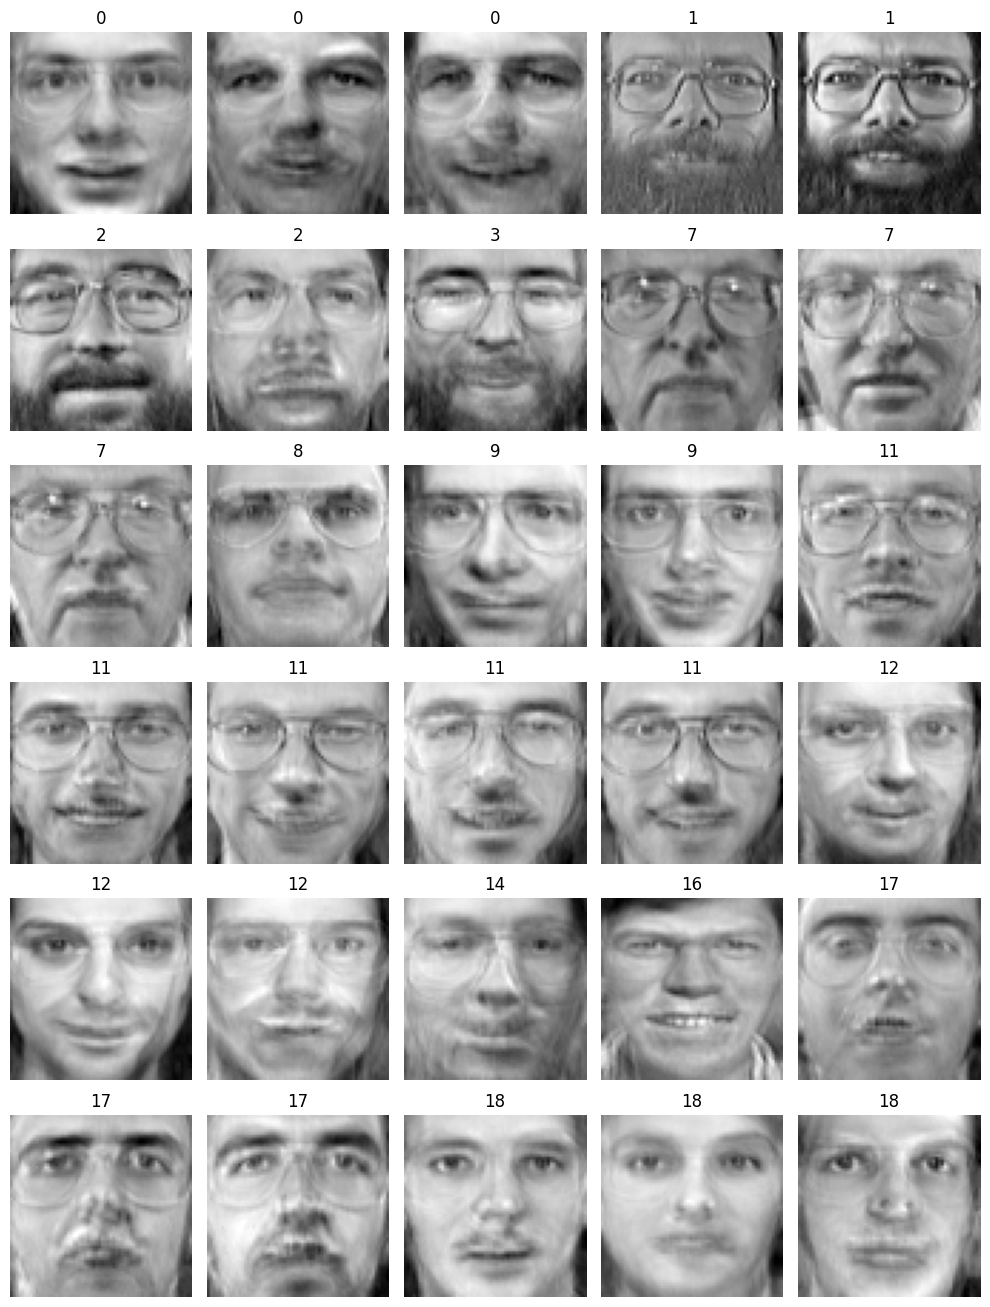

In [27]:
plot_faces(generated_faces, y_gen_faces)

## 3. Take the first 5 images of your dataset and create 15 changed images. The first five(changed) images must be rotated 90 degrees counterclockwise. The second five (changed) images must beflipped. The third five images must be darker than the original images (multiply their channels by 0.3.)

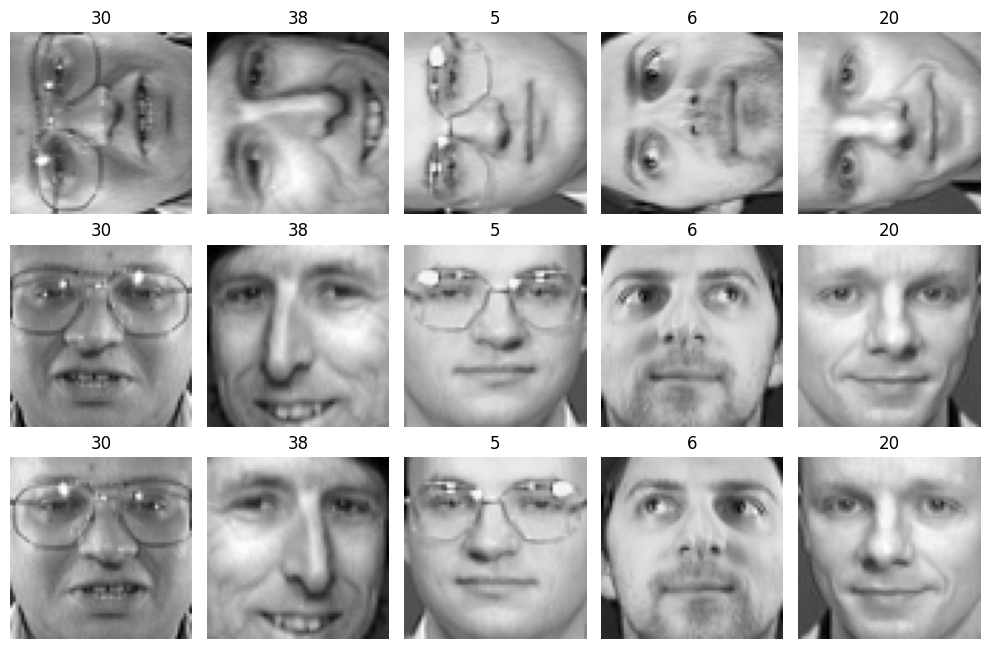

In [13]:
import numpy as np
from scipy.ndimage import rotate

# Rotate images
n_rotated = 5
rotated = np.array([rotate(X_train[i].reshape(64, 64), 90) for i in range(n_rotated)])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

# Flip images
n_flipped = 5
flipped = np.array([np.fliplr(X_train[i].reshape(64, 64)) for i in range(n_flipped)])
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

# Darken images
n_darkened = 5
darkened = X_train[:n_darkened].copy()
darkened *= 0.3  # Multiply by 0.3 to darken
y_darkened = y_train[:n_darkened]

# Combine all modified images
X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

# Plot the modified faces
plot_faces(X_bad_faces, y_bad)

## 4. Compute the log-likelihood of each sample. (you can use the gm methods.) Compare these log-likelihoods with the main data scores (maybe for the first 15 samples). Explain the results and describe how we use GMMs for anomaly detection.

ignore this part for now:D

In [14]:
X_bad_faces_pca = pca.transform(X_bad_faces)

In [15]:
# Compute log-likelihoods for the modified faces
log_likelihoods_bad = gm.score_samples(X_bad_faces_pca)

# Compute log-likelihoods for the first 15 samples of the original data
X_original_pca = pca.transform(X_train[:15])
log_likelihoods_original = gm.score_samples(X_original_pca)

# Print the results
print("Log-likelihoods for modified faces:")
print(log_likelihoods_bad)
print("\nLog-likelihoods for original faces:")
print(log_likelihoods_original)

Log-likelihoods for modified faces:
[-17420887.59164778 -26934333.54107535 -21899276.17864823
 -21327883.2486379  -16435006.40573636 -21875255.53386221
  -6594999.97594487  -5809198.90957877 -15721783.85738573
  -4317419.52317916 -52401295.21138712 -69019875.41853012
 -41762365.76965185 -50265377.89634565 -58217702.94932932]

Log-likelihoods for original faces:
[741.03690914 699.35870328 771.10635365 799.54001964 725.12627701
 629.28315989 666.49889049 605.63209903 605.63224272 629.28315143
 605.63209305 725.12629001 676.61149883 629.28316353 666.49888198]



Average log-likelihood for modified faces: -28666844.13
Average log-likelihood for original faces: 678.38


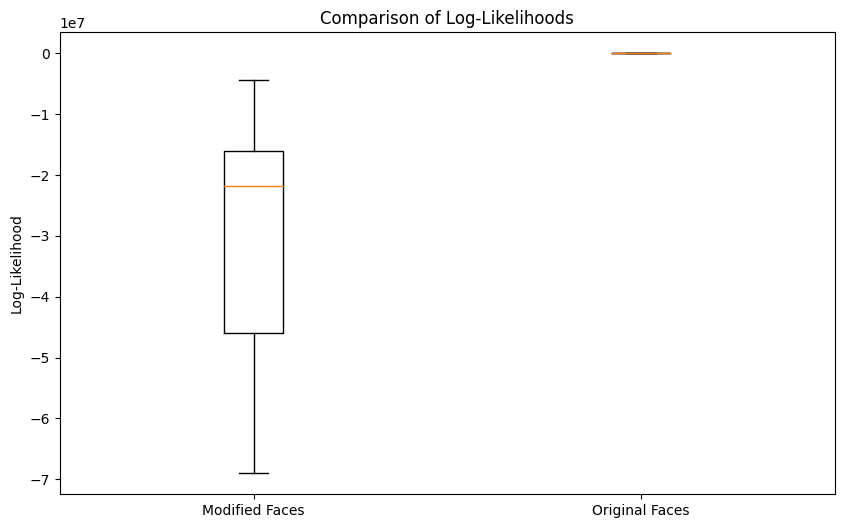

In [16]:
# Compute and print average log-likelihoods
print(f"\nAverage log-likelihood for modified faces: {np.mean(log_likelihoods_bad):.2f}")
print(f"Average log-likelihood for original faces: {np.mean(log_likelihoods_original):.2f}")

# Visualize the comparison
plt.figure(figsize=(10, 6))
plt.boxplot([log_likelihoods_bad, log_likelihoods_original], labels=['Modified Faces', 'Original Faces'])
plt.title('Comparison of Log-Likelihoods')
plt.ylabel('Log-Likelihood')
plt.show()

The boxplot shows a comparison of log-likelihoods between Modified Faces and Original Faces. Here's an interpretation of the results:
1.	Distribution Comparison:
•	The log-likelihoods for Modified Faces are generally lower than those for Original Faces.
•	The median log-likelihood (represented by the line in the middle of each box) is lower for Modified Faces.
•	There's more variability in the log-likelihoods of Modified Faces, as indicated by the larger box and longer whiskers.
2.	Outliers:
•	The Modified Faces group shows several outliers below the lower whisker, indicating some modifications resulted in extremely low log-likelihoods.
•	The Original Faces group has fewer outliers, suggesting more consistent log-likelihoods.
These results align with expectations because the GMM was trained on the original face data distribution. Modified faces, being different from this learned distribution, naturally have lower log-likelihoods. Using GMMs for Anomaly Detection:
1.	Model Training:
•	A GMM is trained on a dataset of "normal" samples (in this case, the original faces).
2.	Establishing a Baseline:
•	Log-likelihoods are computed for the training set to understand the typical range for normal data.
3.	Threshold Setting:
•	A threshold is set based on the distribution of log-likelihoods from normal data. This could be, for example, the mean minus two or three standard deviations.
4.	Anomaly Detection:
•	For new samples, their log-likelihoods are computed using the trained GMM.
•	Samples with log-likelihoods below the threshold are classified as anomalies.
5.	Interpretation:
•	In this case, many of the modified faces would likely be detected as anomalies due to their lower log-likelihoods compared to the original faces.
•	The degree of modification affects the likelihood of detection. Heavily modified faces (e.g., darkened images) are more likely to be flagged as anomalies than slightly modified ones (e.g., small rotations).
6.	Considerations:
•	The number of components in the GMM can affect performance and should be tuned.
•	GMMs assume the data follows a mixture of Gaussian distributions, which may not always hold true for all datasets.
This approach allows for unsupervised anomaly detection, which is particularly useful when labeled anomaly data is scarce or unavailable. The plot clearly demonstrates the GMM's ability to distinguish between normal (original) and potentially anomalous (modified) faces based on their log-likelihoods.

